In [159]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# Load the dataset
data1 = pd.read_csv('traffic_weather.csv')
data1.head(20)

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature
0,Azie MortonBarton Springs,7,9,2019,1,2,0,NB,28.0,9.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
1,Azie MortonBarton Springs,7,9,2019,1,2,0,SB,24.0,8.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
2,Azie MortonBarton Springs,7,9,2019,0,2,0,NB,28.0,25.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
3,Azie MortonBarton Springs,7,9,2019,0,2,0,SB,28.0,36.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
4,Azie MortonBarton Springs,7,8,2019,23,1,0,NB,27.0,26.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,33.227611
5,Azie MortonBarton Springs,7,8,2019,23,1,0,SB,28.0,54.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,33.227611
6,Azie MortonBarton Springs,7,8,2019,22,1,0,NB,27.0,82.0,2019-07-08 22:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,34.237753
7,Azie MortonBarton Springs,7,8,2019,22,1,0,SB,28.0,107.0,2019-07-08 22:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,34.237753
8,Azie MortonBarton Springs,7,8,2019,21,1,0,NB,26.0,99.0,2019-07-08 21:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,35.041926
9,Azie MortonBarton Springs,7,8,2019,21,1,0,SB,27.0,159.0,2019-07-08 21:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,35.041926


## Creating a lagged variable

In [162]:
# Convert 'Full Date' to datetime
data1['Full Date'] = pd.to_datetime(data1['Full Date'], errors='coerce')
data1 = data1.dropna(subset=['Full Date'])  # Drop invalid dates
# Compute Daily Traffic
data1['Daily_Traffic'] = data1.groupby(data1['Full Date'].dt.date)['Volume'].transform('sum')

# Add a single lagged variable
data1['Lag_Daily_Traffic'] = data1['Daily_Traffic'].shift(1)

# Drop rows with missing lagged traffic data
data1 = data1.dropna(subset=['Lag_Daily_Traffic'])

In [163]:
# Encode categorical variables
label_encoder = LabelEncoder()
data1['Intersection Name'] = label_encoder.fit_transform(data1['Intersection Name'])
data1['Direction'] = label_encoder.fit_transform(data1['Direction'])

In [164]:
# Define predictors (including encoded categorical variables)
features = [
    'Lag_Daily_Traffic','Intersection Name', 'Month', 'Day', 'Year', 'Hour', 'Day of Week',
    'Holiday', 'Direction', 'Speed', 'prcp', 'snow', 'wspd', 'temperature'
]
X = data1[features]
y = data1['Volume']

# Scale predictors and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [165]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(
    y_train.flatten(),  # Target variable
    exog=X_train,  # Exogenous predictors
    order=(1, 0, 0),  # Non-seasonal parameters
    seasonal_order=(0, 0, 0, 7)  # Seasonal parameters
)
sarima_result = sarima_model.fit(disp=False)

In [167]:
# Predict on test data
y_pred_scaled = sarima_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Rescale predictions and true values
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"SARIMA RMSE: {rmse}")
print(f"SARIMA R²: {r2}")

SARIMA RMSE: 398.2221374481049
SARIMA R²: 0.3298151673988948


In [168]:
latest_date = data1['Full Date'].max()
print(f"The latest date in the dataset is: {latest_date}")

The latest date in the dataset is: 2021-09-07 23:00:00


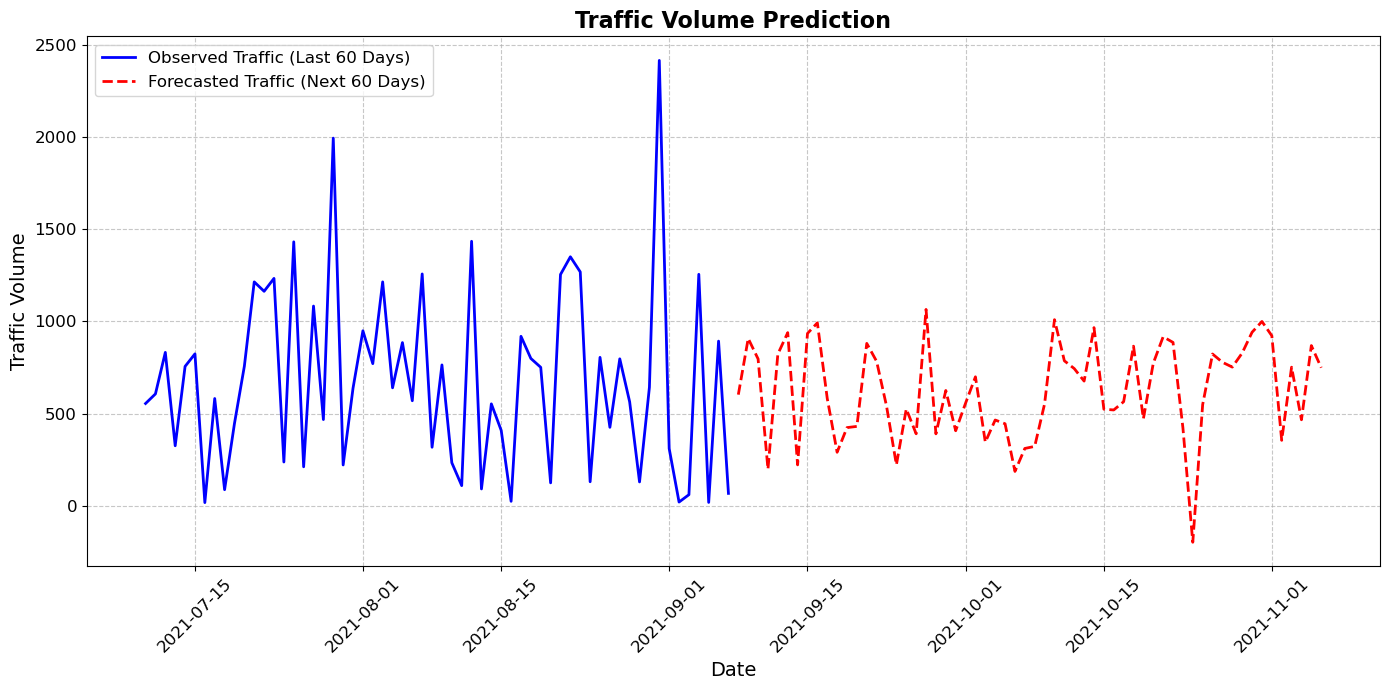

In [169]:
# Forecast horizon for unseen data
forecast_horizon = 60  # Number of days to predict

# Use the SARIMA model to forecast the next 30 days
forecast_values = sarima_result.forecast(steps=forecast_horizon, exog=X_test[-forecast_horizon:])

# Rescale the forecasted values to the original scale
forecast_rescaled = scaler_y.inverse_transform(forecast_values.reshape(-1, 1))

# Combine observed data and forecasted data
#last_60_days = y_train[-60:]  # Last 60 days from training data
#observed_values = scaler_y.inverse_transform(last_60_days.reshape(-1, 1)).flatten()  # Rescale to original scale

# Combine observed data and forecasted data
last_60_days = y_train[-60:]  # Last 60 days from training data
observed_values = scaler_y.inverse_transform(last_60_days.reshape(-1, 1)).flatten()  # Rescale to original scale

# Dynamically calculate the start date
latest_date = data1['Full Date'].max().date()  # Replace 'Full Date' with your actual datetime column
dates = pd.date_range(start=latest_date - pd.Timedelta(days=59), periods=60 + forecast_horizon, freq="D")


# Create date range for plotting
#dates = pd.date_range(start="2022-01-01", periods=60 + forecast_horizon, freq="D")  # Adjust start date as needed

# Plot the observed and forecasted data
plt.figure(figsize=(14, 7))

# Observed values
plt.plot(dates[:60], observed_values, label='Observed Traffic (Last 60 Days)', color='blue', linewidth=2)

# Forecasted values
plt.plot(dates[60:], forecast_rescaled, label='Forecasted Traffic (Next 60 Days)', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Titles and labels
plt.title('Traffic Volume Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adjust legend
plt.legend(loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()